In [14]:
### Dataset
#fruits.zip

In [15]:
#### Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

In [16]:
## Create image data generator object
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

In [17]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [18]:
## Read the images
train = train_datagen.flow_from_directory('fruits/training_set',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 13 images belonging to 2 classes.


In [19]:
train.filenames

['apple\\1.jpg',
 'apple\\2.jpeg',
 'apple\\3.jpeg',
 'apple\\4.jpeg',
 'apple\\5.jpg',
 'apple\\6.jpg',
 'apple\\7.jpg',
 'orange\\1.jpeg',
 'orange\\2.jpg',
 'orange\\3.jpeg',
 'orange\\4.jpeg',
 'orange\\5.jpg',
 'orange\\6.jpg']

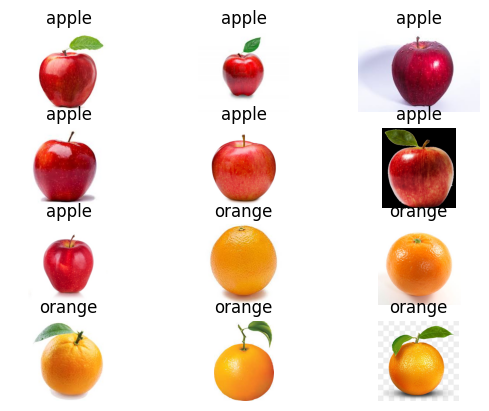

In [20]:
i = 1
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory+"/"+fname)
    plt.subplot(4,3,i)
    plt.axis("off")
    i+=1
    plt.title(fname.split('\\')[0])
    plt.imshow(img)


In [21]:
## Read the images
test = test_datagen.flow_from_directory('fruits/test_set',
                                          target_size=(64,64),
                                          class_mode='binary')

Found 6 images belonging to 2 classes.


### Build the model

In [39]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 8)         1160      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 16)               

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.fit(train,epochs=50,validation_data=test)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.7187 - accuracy: 0.5385 - val_loss: 0.6797 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 223ms/step - loss: 0.6654 - accuracy: 0.5385 - val_loss: 0.6491 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 202ms/step - loss: 0.6375 - accuracy: 0.5385 - val_loss: 0.6251 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 238ms/step - loss: 0.6096 - accuracy: 0.6923 - val_loss: 0.5939 - val_accuracy: 0.8333
Epoch 5/50
1/1 [==============================] - 0s 206ms/step - loss: 0.5603 - accuracy: 0.9231 - val_loss: 0.5624 - val_accuracy: 0.8333
Epoch 6/50
1/1 [==============================] - 0s 236ms/step - loss: 0.5386 - accuracy: 0.8462 - val_loss: 0.5238 - val_accuracy: 1.0000
Epoch 7/50
1/1 [==============================] - 0s 240ms/step - loss: 0.4859 - accuracy: 1.0000 - val_loss: 0.4870 - val_accuracy: 1.0000
Epoch 8/50
1/1 [=======

In [43]:
import cv2
img = plt.imread('fruits/sample1.jpg')

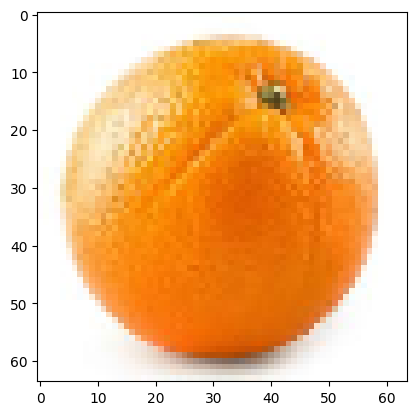

In [44]:
img = cv2.resize(img,(64,64))
plt.imshow(img)

In [46]:
img = img.reshape(1,64,64,3)
model.predict(img)[0][0]


1/1 [==============================] - 0s 33ms/step


1.0

In [50]:
img = plt.imread('fruits/sample2.jpg')

1/1 [==============================] - 0s 55ms/step


0.0

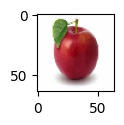

In [51]:
img = cv2.resize(img,(64,64))
plt.figure(figsize=(1,1))
plt.imshow(img)
img = img.reshape(1,64,64,3)
model.predict(img)[0][0]

In [52]:
train.class_indices

{'apple': 0, 'orange': 1}